In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Diabetes data

In [35]:
db = pd.read_csv('NCD_RisC_Lancet_2016_DM_age_standardised_countries.csv')
db.head()

,Country/Region/World,ISO,Sex,Year,Age-standardised diabetes prevalence,Lower 95% uncertainty interval,Upper 95% uncertainty interval
0,Afghanistan,AFG,Men,1980,0.044712,0.015339,0.094918
1,Afghanistan,AFG,Men,1981,0.046114,0.016883,0.093777
2,Afghanistan,AFG,Men,1982,0.047601,0.018745,0.094018
3,Afghanistan,AFG,Men,1983,0.049173,0.020375,0.093950
4,Afghanistan,AFG,Men,1984,0.050834,0.022269,0.093679


In [124]:
db_p = db.pivot_table(values = 'Age-standardised diabetes prevalence', index='ISO', columns= 'Year')
                         

## World bank data

In [126]:
wb = pd.read_csv('../WB/Indicators.csv')
wb.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [143]:
countries = [
    'CHN', 
    'IND',
    'EGY',
    'BRA',
    'USA',
    'GBR',
    'BGD',
    'ZAF',
    'DEU',
    'MEX'
    
]

In [144]:
wb_list = [
    #'External resources for health (% of total expenditure on health)',
    #'Health expenditure per capita (current US$)',
    #'Health expenditure per capita, PPP (constant 2011 international $)',
    #'Health expenditure, private (% of GDP)',
    #'Health expenditure, public (% of GDP)',
    #'Health expenditure, public (% of total health expenditure)',
    #'Health expenditure, total (% of GDP)', 'Out-of-pocket health expenditure (% of private expenditure on health)',
    #'Out-of-pocket health expenditure (% of total expenditure on health)',
    #'Population, total',
    'Urban population (% of total)',
    #'Life expectancy at birth, female (years)',
    #'Life expectancy at birth, male (years)',
    #'Life expectancy at birth, total (years)',
    #'Mortality rate, adult, female (per 1,000 female adults)',
    #'Mortality rate, adult, male (per 1,000 male adults)',
    #'GDP per capita (current US$)',
    #'Physicians (per 1,000 people)', 'Population growth (annual %)',
    #'Population in largest city',
    #'Population in urban agglomerations of more than 1 million',
    #'Urban population growth (annual %)',
    #'Prevalence of overweight, weight for height, female (% of children under 5)',
    #'Prevalence of overweight, weight for height, male (% of children under 5)',
    #'Prevalence of severe wasting, weight for height (% of children under 5)',
    #'Prevalence of severe wasting, weight for height, female (% of children under 5)',
    #'Prevalence of severe wasting, weight for height, male (% of children under 5)',
    #'Prevalence of stunting, height for age, female (% of children under 5)',
    #'Prevalence of stunting, height for age, male (% of children under 5)',
    #'Prevalence of underweight, weight for age, female (% of children under 5)',
    #'Prevalence of underweight, weight for age, male (% of children under 5)',
    #'Prevalence of wasting, weight for height, female (% of children under 5)',
    #'Prevalence of wasting, weight for height, male (% of children under 5)',
    
]

In [146]:
wb = wb[wb.IndicatorName=='Urban population (% of total)']
wb.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
79,Arab World,ARB,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,31.285384
156,Caribbean small states,CSS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,31.597490
227,Central Europe and the Baltics,CEB,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,44.507921
349,East Asia & Pacific (all income levels),EAS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,22.471132
472,East Asia & Pacific (developing only),EAP,Urban population (% of total),SP.URB.TOTL.IN.ZS,1960,16.917679


In [147]:
wb_p = wb.pivot_table(values='Value', index='CountryCode', columns='Year')

In [148]:
urb = wb_p.loc[countries, 1980:]
urb

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
CountryCode,,,,,,,,,,,,,,,,,,,,,
CHN,19.358,20.118,20.902,21.545,22.203,22.874,23.559,24.259,24.974,25.701,...,42.522,43.868,45.199,46.539,47.880,49.226,50.573,51.889,53.168,54.410
IND,23.098,23.417,23.647,23.879,24.113,24.348,24.585,24.823,25.063,25.305,...,29.235,29.569,29.906,30.246,30.587,30.930,31.276,31.631,31.994,32.366
EGY,43.858,43.874,43.890,43.906,43.922,43.938,43.954,43.877,43.744,43.611,...,43.027,43.073,43.078,43.058,43.039,43.019,43.000,43.002,43.025,43.069
BRA,65.468,66.370,67.262,68.142,69.010,69.862,70.703,71.529,72.342,73.139,...,82.834,83.143,83.448,83.749,84.044,84.335,84.623,84.901,85.171,85.433
USA,73.738,73.890,74.042,74.194,74.344,74.494,74.644,74.793,74.942,75.089,...,79.928,80.099,80.269,80.438,80.606,80.772,80.940,81.108,81.277,81.447
GBR,78.481,78.588,78.539,78.489,78.440,78.390,78.340,78.290,78.240,78.190,...,79.915,80.199,80.479,80.757,81.031,81.302,81.570,81.834,82.092,82.345
BGD,14.851,15.801,16.212,16.631,17.060,17.496,17.941,18.395,18.859,19.330,...,26.809,27.517,28.237,28.968,29.709,30.462,31.225,31.990,32.753,33.516
ZAF,48.425,48.591,48.756,48.922,49.088,49.372,49.905,50.439,50.972,51.505,...,59.536,60.077,60.616,61.154,61.687,62.218,62.746,63.272,63.788,64.298
DEU,72.844,72.989,73.107,73.103,72.943,72.711,72.617,72.205,72.999,72.976,...,73.355,73.494,73.695,73.895,74.093,74.291,74.488,74.688,74.890,75.094


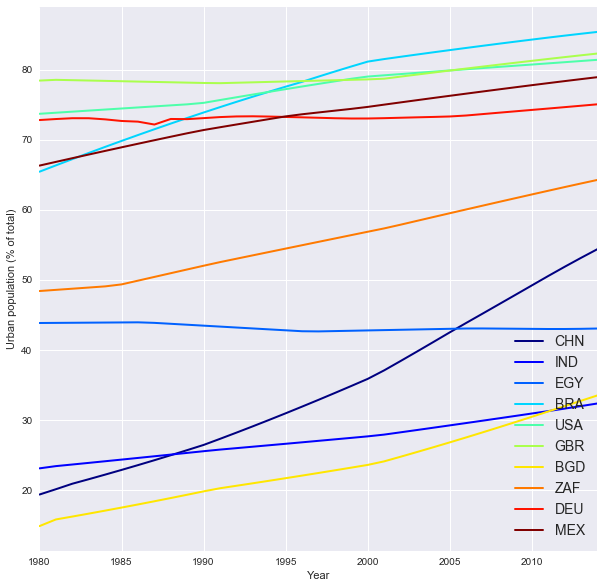

In [149]:
urb.T.plot(figsize=(10, 10), cmap=plt.cm.jet, linewidth=2)
plt.ylabel('Urban population (% of total)')
plt.legend(fontsize = 14)
plt.show()

In [150]:
c={}
for country in countries:
    d = db_p.loc[country, :]
    u = urb.loc['IND', 1980:]
    c[country] = stats.pearsonr(u, d)
    
c

{'BGD': (0.997170216439769, 1.125461487860008e-38),
 'BRA': (0.99845522502403738, 5.2210838286597791e-43),
 'CHN': (0.99342677067287843, 1.1990786939034555e-32),
 'DEU': (0.92881813432744709, 8.7278906724541348e-16),
 'EGY': (0.99774976230751344, 2.5763941270445139e-40),
 'GBR': (0.97087681720595931, 4.7130174419080248e-22),
 'IND': (0.97724823604568567, 8.4055159603599575e-24),
 'MEX': (0.98613799952669678, 2.5257368339159226e-27),
 'USA': (0.98038996639950782, 7.4092461844285626e-25),
 'ZAF': (0.99517990634894993, 7.2692710513515333e-35)}

In [129]:
db_p.loc[countries, :]

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ISO,,,,,,,,,,,,,,,,,,,,,
IND,0.041327,0.042652,0.044043,0.045508,0.047015,0.048574,0.050144,0.051742,0.053414,0.055108,...,0.079993,0.081059,0.082016,0.082842,0.083594,0.084296,0.084935,0.085590,0.086236,0.086899
BRA,0.051785,0.052711,0.053632,0.054495,0.055380,0.056275,0.057202,0.058143,0.059041,0.059911,...,0.072831,0.073816,0.074817,0.075827,0.076814,0.077858,0.078879,0.080010,0.081183,0.082399
GBR,0.043744,0.044039,0.044395,0.044806,0.045261,0.045745,0.046250,0.046797,0.047353,0.047946,...,0.055860,0.056136,0.056385,0.056586,0.056743,0.056925,0.057142,0.057331,0.057560,0.057831
ZAF,0.062241,0.062770,0.063353,0.063966,0.064661,0.065385,0.066162,0.067017,0.067965,0.068973,...,0.094563,0.096574,0.098602,0.100596,0.102448,0.104259,0.106070,0.107858,0.109648,0.111493
DEU,0.046043,0.045990,0.045951,0.045971,0.046041,0.046141,0.046260,0.046420,0.046590,0.046783,...,0.049323,0.049321,0.049303,0.049291,0.049226,0.049215,0.049235,0.049309,0.049432,0.049607


In [156]:
leg = ["{} pearsonr(: {:.3}".format(i,c[i][0]) for i in countries]
leg

['CHN pearsonr: 0.993',
 'IND pearsonr: 0.977',
 'EGY pearsonr: 0.998',
 'BRA pearsonr: 0.998',
 'USA pearsonr: 0.98',
 'GBR pearsonr: 0.971',
 'BGD pearsonr: 0.997',
 'ZAF pearsonr: 0.995',
 'DEU pearsonr: 0.929',
 'MEX pearsonr: 0.986']

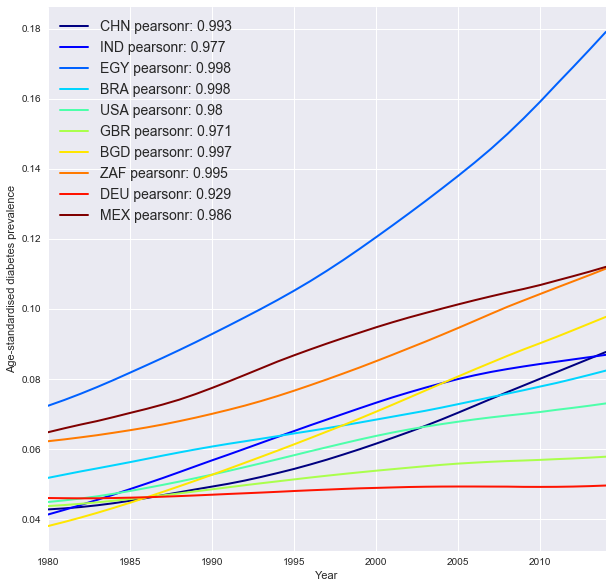

In [157]:
db_p.loc[countries, :].T.plot(figsize=(10, 10), cmap=plt.cm.jet, linewidth=2)
plt.ylabel('Age-standardised diabetes prevalence')
leg = ["{} pearsonr: {:.3}".format(i,c[i][0]) for i in countries]
plt.legend(leg, fontsize = 14)
plt.show()